In [156]:
include(joinpath(dirname(Base.active_project()), "src", "AutoSpider.jl"))
using .AutoSpider, HDF5

include(joinpath(AutoSpider.FUNCTION_PATH, "VizUtils.jl"))
using .VizUtils

orders::Array{Int} = [2,3,4]

3-element Vector{Int64}:
 2
 3
 4

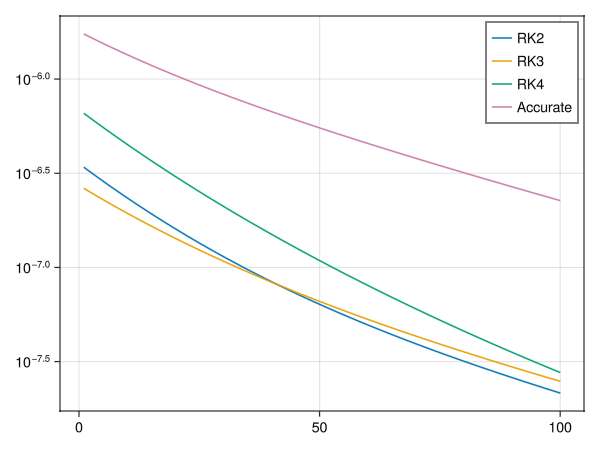

In [162]:
using Statistics, LinearAlgebra, GLMakie

viz_dict::Dict = Dict()

for i in eachindex(orders)
    viz_dict[i] = Dict()
    path::String = joinpath(AutoSpider.HDF5_PATH, "explicit", "data-RK" * repr(orders[i]) * ".hdf5")
    h5open(path, "r") do file
        viz_dict[i]["p"] = read(file, "result/value/p/value")
    end
end

# implicit to compare
viz_dict[0] = Dict()
path::String = joinpath(AutoSpider.HDF5_PATH, "implicit", "data-RK6.hdf5")
h5open(path, "r") do file
    viz_dict[0]["p"] = read(file, "result/value/p/value")
end

start = 1
tr = start:100

function sq_mean_each_step(F::AbstractArray)
    return [mean(F[:,:,t].^2) for t = tr]
end

f = Figure()
ax = Axis(f[1, 1], yscale=log10)
lines!(ax, tr, sq_mean_each_step(viz_dict[1]["p"]), label="RK2")
lines!(ax, tr, sq_mean_each_step(viz_dict[2]["p"]), label="RK3")
lines!(ax, tr, sq_mean_each_step(viz_dict[3]["p"]), label="RK4")
lines!(ax, tr, sq_mean_each_step(viz_dict[0]["p"]), label="Accurate")

axislegend(position = :rt)

f

In [164]:
model_results::Dict = Dict()

for i in eachindex(orders)
    path::String = joinpath(AutoSpider.HDF5_PATH, "explicit", "data-RK" * repr(orders[i]) * ".hdf5")
    model_results[i] = AutoSpider.auto_spider(path, joinpath("compare", "settings_exp.json"))
    println()
end

model_results[0] = AutoSpider.auto_spider(joinpath(AutoSpider.HDF5_PATH, "implicit", "data-RK6.hdf5"), joinpath("compare", "settings_default.json"))

∂Bx/∂t - 0.016∂^2Bx/∂x^2 - 0.016∂^2Bx/∂y^2 - ∂uBy/∂y + ∂vBx/∂y = 0
∂u/∂x + ∂v/∂y = 0
∂u/∂t + ∂u^2/∂x + ∂uv/∂y - 0.016∂^2u/∂x^2 - 0.016∂^2u/∂y^2 + ∂P/∂x - ∂Bx^2/∂x - ∂BxBy/∂y = 0
∂By/∂t - 0.016∂^2By/∂x^2 - 0.016∂^2By/∂y^2 + ∂uBy/∂x - ∂vBx/∂x = 0
∂v/∂t + ∂uv/∂x + ∂v^2/∂y - 0.016∂^2v/∂x^2 - 0.016∂^2v/∂y^2 + ∂P/∂y - ∂By^2/∂y - 0.995∂BxBy/∂x = 0

∂u/∂x + ∂v/∂y = 0
∂By/∂t - 0.016∂^2By/∂x^2 - 0.016∂^2By/∂y^2 + ∂uBy/∂x - ∂vBx/∂x = 0
∂u/∂t + 0.995∂u^2/∂x + 0.994∂uv/∂y - 0.016∂^2u/∂x^2 - 0.016∂^2u/∂y^2 + ∂P/∂x - 0.995∂Bx^2/∂x - ∂BxBy/∂y = 0
∂Bx/∂t - 0.016∂^2Bx/∂x^2 - 0.016∂^2Bx/∂y^2 - ∂uBy/∂y + ∂vBx/∂y = 0
∂v/∂t + 0.991∂uv/∂x + 0.992∂v^2/∂y - 0.016∂^2v/∂x^2 - 0.016∂^2v/∂y^2 + 0.994∂P/∂y - ∂By^2/∂y - ∂BxBy/∂x = 0

∂u/∂t + ∂u^2/∂x + ∂uv/∂y - 0.016∂^2u/∂x^2 - 0.016∂^2u/∂y^2 + ∂P/∂x - 0.994∂Bx^2/∂x - ∂BxBy/∂y = 0
∂By/∂t - 0.016∂^2By/∂x^2 - 0.016∂^2By/∂y^2 + 0.993∂uBy/∂x - 0.993∂vBx/∂x = 0
∂u/∂x + ∂v/∂y = 0
∂Bx/∂t - 0.016∂^2Bx/∂x^2 - 0.016∂^2Bx/∂y^2 - 0.994∂uBy/∂y + 0.993∂vBx/∂y = 0
∂v/∂t + 0.993∂uv/

Dict{Int64, Dict{String, Any}} with 5 entries:
  5 => Dict("label"=>["∂v/∂t", "∂uv/∂x", "∂v^2/∂y", "∂^2v/∂x^2", "∂^2v/∂y^2", "…
  4 => Dict("label"=>["∂u/∂t", "∂u^2/∂x", "∂uv/∂y", "∂^2u/∂x^2", "∂^2u/∂y^2", "…
  2 => Dict("label"=>["∂By/∂t", "∂^2By/∂x^2", "∂^2By/∂y^2", "∂uBy/∂x", "∂vBx/∂x…
  3 => Dict("label"=>["∂Bx/∂t", "∂^2Bx/∂x^2", "∂^2Bx/∂y^2", "∂uBy/∂y", "∂vBx/∂y…
  1 => Dict("label"=>["∂u/∂x", "∂v/∂y"], "cs"=>[0.0 0.707101 … -0.319819 0.3170…

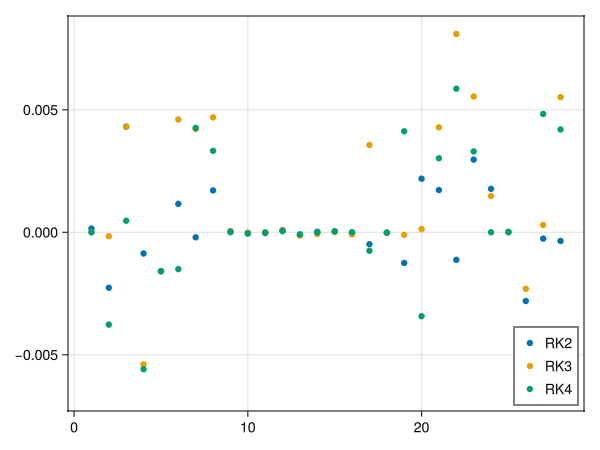

In [165]:
label_weight_dict::Dict = Dict()

for i in [[0]; eachindex(orders)]
    label_weight_dict[i] = Dict()
    for j in 1:5
        for k in eachindex(model_results[i][j]["label"])
            label_index::String = model_results[i][j]["label"][k]
            coeff::Float64 = model_results[i][j]["coeff"][k]
            label_weight_dict[i][label_index] = coeff
        end
    end
end

label_arr::Vector{String} = sort(collect(keys(label_weight_dict[length(orders) - 1])))

function get_label_diffs(k)::Vector{Float64}
    return ([label_weight_dict[0][key] - label_weight_dict[k][key] for key in label_arr if key in keys(label_weight_dict[k])])
end

f = Figure()
ax = Axis(f[1, 1])
for k in 1:length(orders)
    scatter!(ax,
    1:length(keys(label_weight_dict[k])),
    get_label_diffs(k),
label="RK" * repr(orders[k]))
end

axislegend(position = :rb)

f